# PROBLEM STATEMENT
--->In this report we applied different ML & Deep Learning techniques for the credit risk analysis which are used for the evaluation for the credit risk datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# KNOWING THE DATASET

In [2]:
df=pd.read_csv("loan4.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other


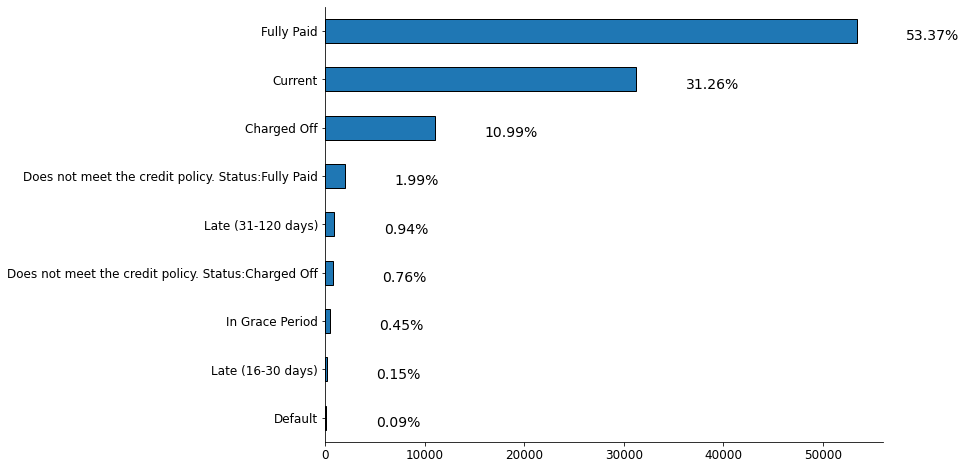

In [4]:
plt.figure(figsize=(10,8))

ax = df['loan_status'].value_counts().sort_values().plot.barh(edgecolor='black', grid=False, fontsize=12)

for p in ax.patches:
    width = p.get_width()
    ax.text(width+5000, p.get_y(), '{:.2%}'.format(width/len(df)), ha='left', va='bottom', fontsize=14)

sns.despine() 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            99999 non-null  int64  
 1   term                 99999 non-null  object 
 2   int_rate             99999 non-null  float64
 3   installment          99999 non-null  float64
 4   grade                99999 non-null  object 
 5   emp_length           96253 non-null  object 
 6   home_ownership       99999 non-null  object 
 7   annual_inc           99995 non-null  float64
 8   verification_status  99999 non-null  object 
 9   loan_status          99999 non-null  object 
 10  purpose              99999 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             3746
home_ownership            0
annual_inc                4
verification_status       0
loan_status               0
purpose                   0
dtype: int64

In [7]:
df.annual_inc = df.annual_inc.fillna(0)
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             3746
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dtype: int64

In [8]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

In [9]:
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.loc[:, 'label'] = df['loan_status'].apply(classify_label)
df = df.drop('loan_status', axis=1)

In [10]:
df['label'].value_counts()

0    86614
1    13385
Name: label, dtype: int64

In [11]:
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0

In [12]:
def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
            return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

In [13]:
def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

In [14]:
    
df["grade"] = df["grade"].apply(SC_LabelEncoder1)
df["emp_length"] = df["emp_length"].apply(SC_LabelEncoder2)
df["home_ownership"] = df["home_ownership"].apply(SC_LabelEncoder3)

In [15]:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000,0,10.65,162.87,4,12,1,24000.0,2,1,0
1,2500,1,15.27,59.83,3,1,1,30000.0,1,0,1
2,2400,0,15.96,84.33,3,12,1,12252.0,0,11,0
3,10000,0,13.49,339.31,3,12,1,49200.0,1,9,0
4,3000,1,12.69,67.79,4,2,1,80000.0,1,9,0


In [16]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000,0,10.65,162.87,4,12,1,24000.0,2,1,0
1,2500,1,15.27,59.83,3,1,1,30000.0,1,0,1
2,2400,0,15.96,84.33,3,12,1,12252.0,0,11,0
3,10000,0,13.49,339.31,3,12,1,49200.0,1,9,0
4,3000,1,12.69,67.79,4,2,1,80000.0,1,9,0
5,5000,0,7.90,156.46,5,4,1,36000.0,1,13,0
6,7000,1,15.96,170.08,3,9,1,47004.0,0,2,0
7,3000,0,18.64,109.43,1,10,1,48000.0,1,0,0
8,5600,1,21.28,152.39,0,5,3,40000.0,1,11,1
9,5375,1,12.69,121.45,4,1,1,15000.0,2,9,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            99999 non-null  int64  
 1   term                 99999 non-null  int32  
 2   int_rate             99999 non-null  float64
 3   installment          99999 non-null  float64
 4   grade                99999 non-null  int64  
 5   emp_length           99999 non-null  int64  
 6   home_ownership       99999 non-null  int64  
 7   annual_inc           99999 non-null  float64
 8   verification_status  99999 non-null  int32  
 9   purpose              99999 non-null  int32  
 10  label                99999 non-null  int64  
dtypes: float64(3), int32(3), int64(5)
memory usage: 7.2 MB


# EXPLORATORY DATA ANALYSIS (EDA)

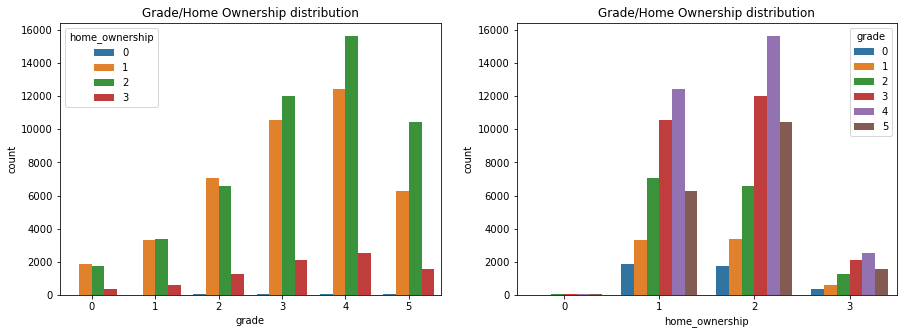

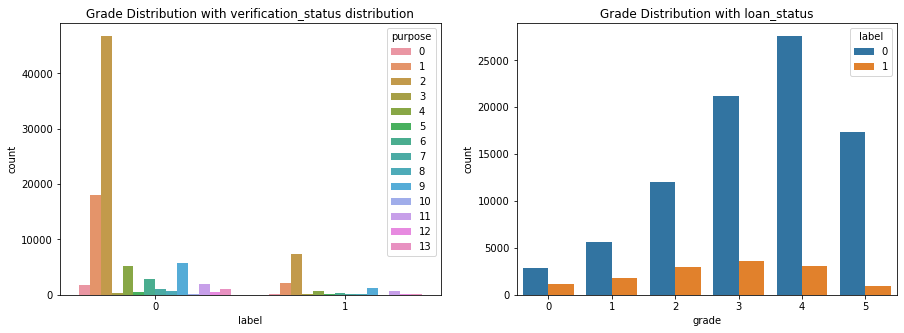

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

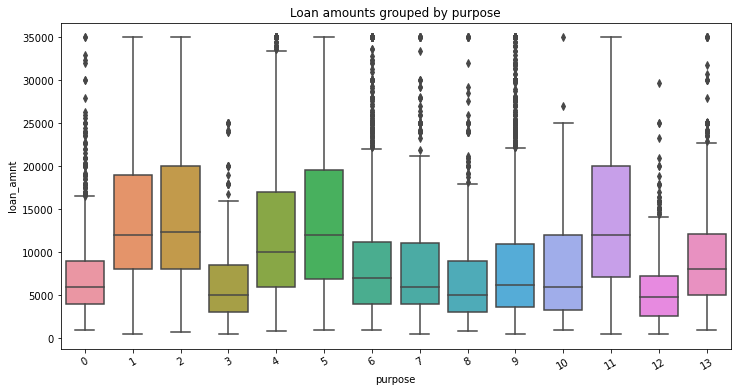

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

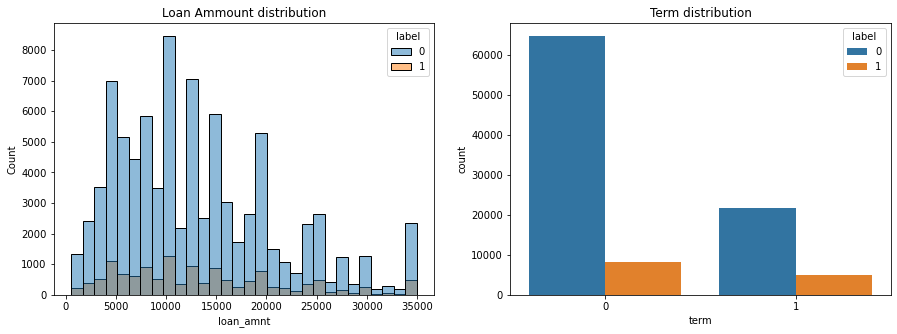

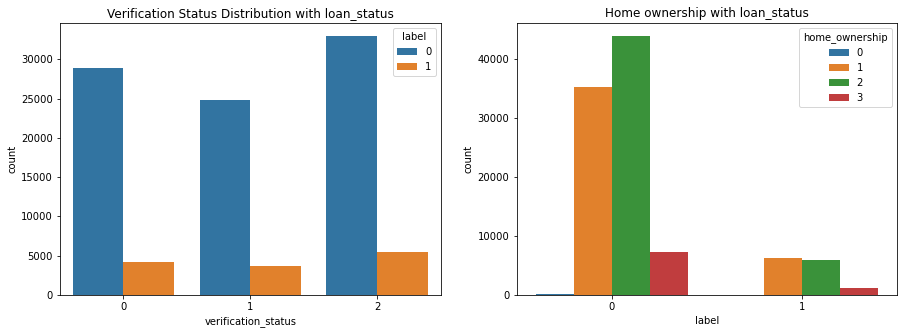

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

In [21]:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000,0,10.65,162.87,4,12,1,24000.0,2,1,0
1,2500,1,15.27,59.83,3,1,1,30000.0,1,0,1
2,2400,0,15.96,84.33,3,12,1,12252.0,0,11,0
3,10000,0,13.49,339.31,3,12,1,49200.0,1,9,0
4,3000,1,12.69,67.79,4,2,1,80000.0,1,9,0


In [22]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
label                  0
dtype: int64

In [23]:
df.label = df.label.fillna(1)

In [24]:
X = df.drop(['label'],axis=1)
Y = df['label']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((69999, 10), (30000, 10), (69999,), (30000,))

In [26]:
Y_train.value_counts(normalize=True)

0    0.867098
1    0.132902
Name: label, dtype: float64

# BALANCING THE DATASET

# OVER-SAMPLING

In [27]:
!pip install imbalanced-learn
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7)
X_train_ovr, Y_train_ovr = sm.fit_resample(X_train,Y_train)

In [28]:
Y_train_ovr.value_counts(normalize=True)

0    0.5
1    0.5
Name: label, dtype: float64

In [29]:
Y_train_ovr.value_counts()

0    60696
1    60696
Name: label, dtype: int64

# K-MEANS CLUSTERING

In [30]:
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


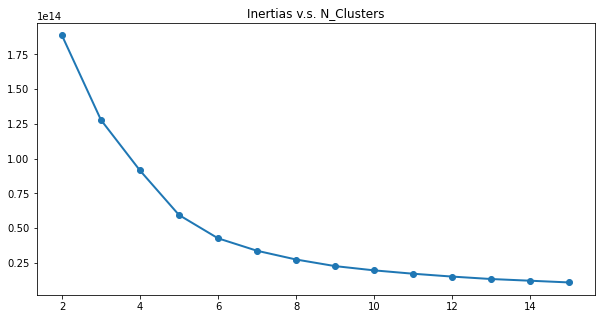

In [31]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [32]:
km = KMeans(n_clusters=5, random_state=0)
clusters = km.fit_predict(df)

In [33]:
clusters

array([4, 4, 4, ..., 0, 4, 0])

In [3]:
from sklearn.metrics import accuracy_score
score = metrics.accuracy_score(Y_test,k_means.predict(X_test))
print('Accuracy:{0:f}'.format(score)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_7524/4211849155.py, line 3)

In [34]:
#X, y = df.drop("label", axis=1), df["label"]
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:

from sklearn.metrics import f1_score
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_ovr,Y_train_ovr)
    score = f1_score(Y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [34]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 2  to get the best prediction, then the average accuracy is  0.7578333333333334


# SUPPORT VECTOR MACHINE (SVM)

In [37]:
from sklearn.svm import SVC
svc = SVC(random_state=7)
svc.fit(X_train_ovr,Y_train_ovr)

SVC(random_state=7)

In [38]:
Y_pred = svc.predict(X_test)
Y_pred.shape, Y_test.shape

((30000,), (30000,))

In [39]:
def apply_model(model,X_train_ovr,Y_train_ovr,X_test,Y_test):
    model.fit(X_train_ovr,Y_train_ovr)
    Y_pred = model.predict(X_test)
    print(Y_pred.shape,Y_test.shape)
    ## evaluation
    from sklearn.metrics import precision_recall_fscore_support
    res = precision_recall_fscore_support(Y_test, Y_pred)
    print("Model name ::", model.__class__)
    print("Result::", res)
    ## return evaluation

In [ ]:
import numpy as np
for c in np.arange(0.5,2,0.2):
    for g in np.arange(0.1,1,0.1):
        print("C value =", c)
        print("gamma value = ", g)
        from sklearn.svm import SVC 
        # create svc model
        svc = SVC( C=c, gamma = g,  random_state=7)
        # apply it 
        # print the results
        apply_model(svc,X_train_ovr,Y_train_ovr,X_test,Y_test)

C value = 0.5
gamma value =  0.1
(30000,) (30000,)
Model name :: <class 'sklearn.svm._classes.SVC'>
Result:: (array([0.86405933, 0.14025086]), array([0.97090825, 0.03013229]), array([0.91437292, 0.04960678]), array([25918,  4082], dtype=int64))
C value = 0.5
gamma value =  0.2
(30000,) (30000,)
Model name :: <class 'sklearn.svm._classes.SVC'>
Result:: (array([0.86388409, 0.1328976 ]), array([0.98464388, 0.01494366]), array([0.92031952, 0.02686633]), array([25918,  4082], dtype=int64))
C value = 0.5
gamma value =  0.30000000000000004
(30000,) (30000,)
Model name :: <class 'sklearn.svm._classes.SVC'>
Result:: (array([0.86399731, 0.14285714]), array([0.99074003, 0.00979912]), array([0.92303821, 0.01834021]), array([25918,  4082], dtype=int64))
C value = 0.5
gamma value =  0.4
(30000,) (30000,)
Model name :: <class 'sklearn.svm._classes.SVC'>
Result:: (array([0.86409655, 0.16470588]), array([0.99452118, 0.00685938]), array([0.92473273, 0.01317027]), array([25918,  4082], dtype=int64))
C va

# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train_ovr,Y_train_ovr)

DecisionTreeClassifier(random_state=7)

In [36]:
Y_pred = dt.predict(X_test)

In [37]:
Y_pred.shape, Y_test.shape

((30000,), (30000,))

In [38]:
from sklearn.metrics import precision_recall_fscore_support
res = precision_recall_fscore_support(Y_test, Y_pred)
#print("Model name ::", model.__class__)
print("Result::", res)

Result:: (array([0.8775771 , 0.18516248]), array([0.79489158, 0.29593337]), array([0.83419039, 0.22779559]), array([25918,  4082], dtype=int64))


In [81]:
score = dt.score(X_test, Y_test)

In [82]:
score

0.727

# RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30, random_state=7, max_samples=0.8) # class_weight=None,
rfc.fit(X_train_ovr,Y_train_ovr)
Y_pred = rfc.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[22332  3586]
 [ 3097   985]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     25918
           1       0.22      0.24      0.23      4082

    accuracy                           0.78     30000
   macro avg       0.55      0.55      0.55     30000
weighted avg       0.79      0.78      0.78     30000

0.7772333333333333


# XGBOOST

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
xgbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=7)

In [45]:
xgbc.fit(X_train_ovr, Y_train_ovr)

GradientBoostingClassifier(learning_rate=1.0, random_state=7)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[22332  3586]
 [ 3097   985]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     25918
           1       0.22      0.24      0.23      4082

    accuracy                           0.78     30000
   macro avg       0.55      0.55      0.55     30000
weighted avg       0.79      0.78      0.78     30000

0.7772333333333333


In [47]:
Y_pred = xgbc.predict(X_test)

# FINE-TUNING XGBOOST

In [48]:
#Fine tune the XGBoost using grid search

from sklearn.model_selection import GridSearchCV
# this is grid search CV ( cv means cross validation --> k fold cross validation)

In [49]:
# param grid is dictionary 
# key --> name of parameter to be tuned
# value --> list of values which you want to check 
param_grid = {
'n_estimators' : [ 50, 200, 500],
'subsample' : [0.7, 0.8, 0.9],
'max_depth' :[ 3, 5,7],
'max_features' : ['sqrt', 'log2']
}

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gscv =GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid, cv=2, verbose=2)

In [52]:
gscv.fit(X_train_ovr,Y_train_ovr)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.7; total time=   3.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.7; total time=   3.0s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.8; total time=   3.3s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.8; total time=   3.2s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.9; total time=   3.4s
[CV] END max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.9; total time=   3.3s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.7; total time=  12.4s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.7; total time=  12.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.8; total time=  13.0s
[CV] END max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.8; total time=  12.4s
[CV] END max_d

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 200, 500],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [53]:
gscv.best_params_ 

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 0.8}

In [54]:
gscv.cv_results_['mean_test_score']

array([0.74754514, 0.74778404, 0.7471003 , 0.78252274, 0.78211085,
       0.78286049, 0.80574502, 0.80605806, 0.806437  , 0.74758633,
       0.75014828, 0.74788289, 0.7832559 , 0.78337946, 0.7834536 ,
       0.80731844, 0.80704659, 0.80672532, 0.7724397 , 0.77462271,
       0.77552887, 0.80965797, 0.80855411, 0.80846349, 0.83774054,
       0.83944576, 0.83966818, 0.77333762, 0.77524054, 0.77303282,
       0.80847173, 0.80820812, 0.81007809, 0.83708976, 0.83897621,
       0.83855608, 0.79099941, 0.79218565, 0.79266344, 0.83138098,
       0.83418182, 0.83425596, 0.85751944, 0.85992487, 0.85967774,
       0.7906699 , 0.79054633, 0.79046395, 0.83048306, 0.83219652,
       0.83519507, 0.8563991 , 0.85861507, 0.85918347])

In [55]:
gscv.cv_results_['mean_test_score'].max()

0.8599248714907077

# ARTIFICIAL NEURAL NETWORK (ANN)

In [83]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [84]:
n_features = X_train_ovr.shape[1]

In [85]:
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [87]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit( X_train_ovr, Y_train_ovr, epochs=100, batch_size=32, validation_split=0.3, verbose=0,shuffle=False)

In [88]:
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.864


In [91]:
models = []
    #models.append(('LR', LogisticRegression()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('ANN',Sequential()))
    #models.append(('RF', ()))
    
    #models.append(('SVM', SVC()))

In [92]:
seed=50
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_ovr, Y_train_ovr, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.719636 (0.047089)
DT: 0.794749 (0.068577)
RF: 0.841490 (0.066331)
GB: 0.762135 (0.062997)


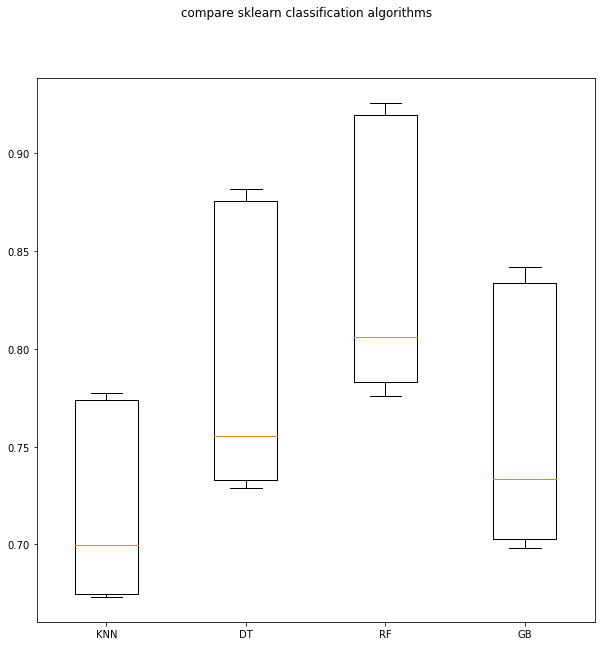

In [93]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()